<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1>Fashion-MNIST Project </h1>


<h2>Table of Contents</h2>


<p>In this project, you will classify  Fashion-MNIST dataset using convolutional neural networks.</p>
<ul>
  
<ul>
<li><a href="#Preparation">Preparation</a></li>
<li><a href="#Q1">Questions 1: Create a Dataset Class</a></li>
<li><a href="#Q2">Define Softmax, Criterion function, Optimizer and Train the Model</a></li>

</ul>
 

</ul>

<p>Estimated Time Needed: <b>30 min</b></p>
<hr>


<a name="Preparation"><h2 id="Preparation" >Preparation</h2></a>


Download the datasets you needed for this lab.


The following are the PyTorch modules you are going to need


In [1]:
%%time
%pip install pandas numpy matplotlib
%pip install torch==2.8.0+cpu torchvision==0.23.0+cpu torchaudio==2.8.0+cpu \
    --index-url https://download.pytorch.org/whl/cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 166.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 201.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 185.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 151.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 148.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://download.pytorch.org/whl/cpu
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 MB 16.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.5 MB/s eta 0:00:00
   ━━━━

In [2]:
!pip install torch
!pip install torchvision
!pip install matplotlib

In [3]:
# PyTorch Modules you need for this lab

from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
torch.manual_seed(0)

Import Non-PyTorch Modules 


In [4]:
# Other non-PyTorch Modules

from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

from PIL import Image

In [5]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

<hr>


<hr>


<a name="Q1"><h2 id="Q1">Questions 1: Create a Dataset Class</h2></a>


In this section, you will load a Dataset object, but first you must transform the dataset. Use the <code>Compose</code> function to perform the following transforms:. 
<ol>
    <li>Use the transforms object to<code> Resize </code> to resize the image.</li>
    <li>Use the transforms object to<code> ToTensor </code> to convert the image to a tensor.</li>
</ol>

You will then take a screen shot of your validation data.


Use the Compose function to compose the transforms


In [ ]:
#Hint:

IMAGE_SIZE = 16

transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
transforms.ToTensor()#
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

<hr>


Create two dataset objects for the Fashion MNIST  dataset. One for training data called <code> dataset_train </code> and one for validation data <code>dataset_val</code>. You will be asked to take a screenshot of several samples.


<b>Hint:</b>
<code>dsets.FashionMNIST(root= '.fashion/data', train=???, transform=composed,  download=True)</code>


Transforms composed successfully.
Image will be resized to (16, 16) and converted to Tensor.

--- Dataset Verification ---
Training dataset size: 60000 samples
Validation dataset size: 10000 samples

Sample Validation Image Tensor Shape: torch.Size([1, 16, 16])
Sample Validation Image Pixel Range: 0.0000 to 0.8627
Sample Validation Label: 9


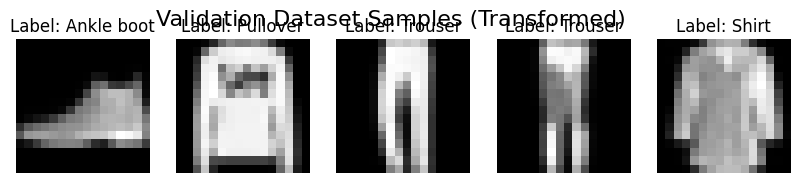

In [9]:
# Enter your code here
import torch
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from typing import Tuple

# --- Configuration ---
IMAGE_SIZE = 16
# Define the root directory where the dataset will be stored
ROOT_DIR = './fashion_data' 

# 1. Use the Compose function to compose the transforms
composed = transforms.Compose([
    # Resize the image to the specified dimensions
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), 
    # Convert the image to a PyTorch tensor
    transforms.ToTensor()
])

print("Transforms composed successfully.")
print(f"Image will be resized to ({IMAGE_SIZE}, {IMAGE_SIZE}) and converted to Tensor.")

# 2. Create two dataset objects for the Fashion MNIST dataset

# Training Dataset
# train=True indicates this is the training split
dataset_train = dsets.FashionMNIST(
    root=ROOT_DIR, 
    train=True, 
    transform=composed,  
    download=True
)

# Validation (Test) Dataset
# train=False indicates this is the validation/test split
dataset_val = dsets.FashionMNIST(
    root=ROOT_DIR, 
    train=False, 
    transform=composed,  
    download=True
)

# --- Verification ---
print("\n--- Dataset Verification ---")
print(f"Training dataset size: {len(dataset_train)} samples")
print(f"Validation dataset size: {len(dataset_val)} samples")

# Example of an item in the validation dataset:
# Get the first image and label from the validation set
image_sample, label_sample = dataset_val[0]

print(f"\nSample Validation Image Tensor Shape: {image_sample.shape}")
print(f"Sample Validation Image Pixel Range: {image_sample.min():.4f} to {image_sample.max():.4f}")
print(f"Sample Validation Label: {label_sample}")

import matplotlib.pyplot as plt

# Function to display a few images
def display_samples(dataset, num_samples=5):
    plt.figure(figsize=(10, 2))
    plt.suptitle("Validation Dataset Samples (Transformed)", fontsize=16)
    
    for i in range(num_samples):
        # Retrieve the image and label
        image, label = dataset[i]
        
        # Move tensor from (C, H, W) to (H, W) for display
        # and detach from the computational graph
        image_np = image.squeeze().cpu().numpy()
        
        # Get the class name
        class_name = dataset.classes[label]
        
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(image_np, cmap='gray')
        plt.title(f"Label: {class_name}")
        plt.axis('off')
        
    plt.show()

# Display the validation samples for the screenshot
display_samples(dataset_val, num_samples=5)

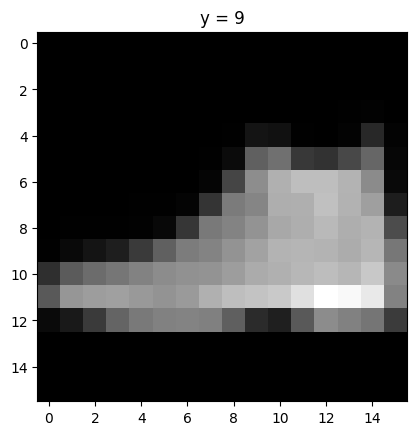

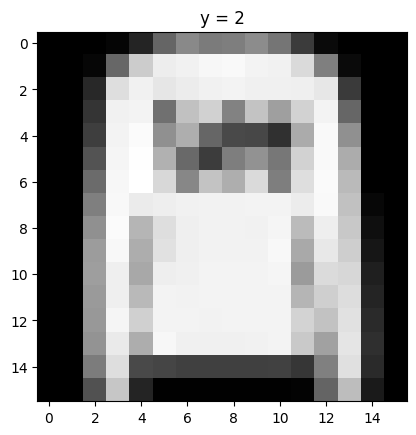

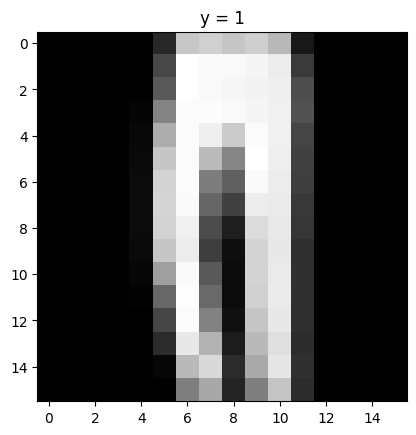

In [7]:
for n,data_sample in enumerate(dataset_val):

    show_data(data_sample)
    plt.show()
    if n==2:
        break 

<a name="Q2"><h2 id="Q2">Questions 2</h2></a>
Create a Convolutional Neural Network class using ONE of the following constructors.  Train the network using the provided code then provide a screenshot of your training cost and accuracy with your validation data.


Constructor  using Batch Norm 


In [14]:
class CNN_batch(nn.Module):
    
    # Constructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x=self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x=self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        return x

Constructor  for regular Convolutional Neural Network


In [12]:
class CNN(nn.Module):
    
    # Constructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x

train loader  and validation loader 


In [15]:
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100 )
test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100 )

Convolutional Neural Network object 


In [16]:
model = CNN(out_1=16, out_2=32,number_of_classes=10)
model =CNN_batch(out_1=16, out_2=32,number_of_classes=10)

Create the objects for the criterion and the optimizer named <code>criterion</code> and <code>optimizer</code>. Make the optimizer use SGD with a learning rate of 0.1 and the optimizer use Cross Entropy Loss


In [17]:
# Enter your code here
import torch
import torch.nn as nn
import torch.optim as optim

# Assuming the model instance (e.g., 'model_cnn' or 'model') has been defined 
# in a previous step and is available here.

# --- Configuration ---
LEARNING_RATE = 0.1

# 1. Define the Criterion (Loss Function)
# Use Cross Entropy Loss for multi-class classification (FashionMNIST has 10 classes).
criterion = nn.CrossEntropyLoss()

# 2. Define the Optimizer
# Use Stochastic Gradient Descent (SGD) with the specified learning rate.
# We pass the parameters of the model (model.parameters()) to the optimizer.
optimizer = optim.SGD(
    # NOTE: Replace 'model' with the actual name of your network instance 
    # (e.g., if you named it 'model_cnn')
    model.parameters(), 
    lr=LEARNING_RATE
)

print(f"Criterion (Loss Function): {criterion}")
print(f"Optimizer: {optimizer}")
print(f"Learning Rate set to: {LEARNING_RATE}")

Criterion (Loss Function): CrossEntropyLoss()
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)
Learning Rate set to: 0.1


Code used to train the model 


In [18]:
import time
start_time = time.time()

cost_list=[]
accuracy_list=[]
N_test=len(dataset_val)
n_epochs=5
for epoch in range(n_epochs):
    cost=0
    model.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        cost+=loss.item()
    correct=0
    #perform a prediction on the validation  data 
    model.eval()
    for x_test, y_test in test_loader:
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)
    

You will use the following to plot the Cost and accuracy for each epoch for the training and testing data, respectively. 


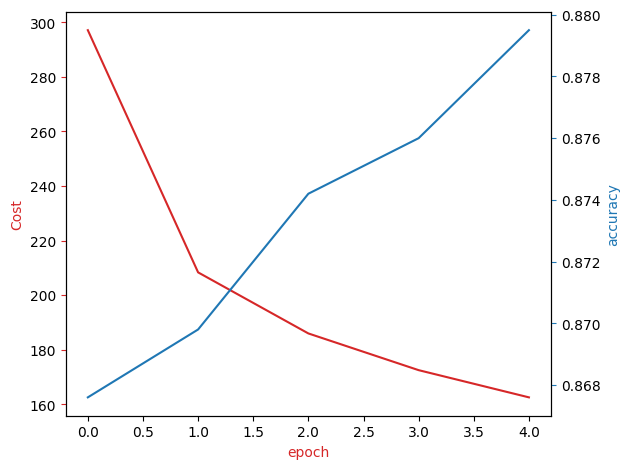

In [19]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

dataset: https://github.com/zalandoresearch/fashion-mnist


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a> 


<hr>


## <h3 align="center"> &#169; IBM Corporation. All rights reserved. <h3/>
